# Clasificación de Ingresos

El objetivo de este proyecto es realizar una clasificación de personas en dos grupos: los que ganan más de $50000 al año y los que no; esto a partir de diferentes características como la edad, la ocupación, el nivel educativo, las horas que trabaja por semana, entre otros. Se utilizarán Árboles de Decisión (Decision Trees) y Bosques Aleatorios (Random Forests) para realizar la clasificación.

Los datos son tomados de UCI Machine Learning Repository y el conjunto de datos es conocido como [Adult](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/).

![](portada.jpg)



## Bibliotecas

### Instalación de las bibliotecas y paquetes a utilizar

In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn imblearn

Note: you may need to restart the kernel to use updated packages.


### Importar las bibliotecas

In [2]:
# Numpy y Pandas para manejo de datos
import numpy as np
import pandas as pd
# Matplotlib y Seaborn para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
# Modelo de Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
# Reducción de Dimensionalidad
from sklearn.decomposition import PCA
# Escalar los datos
from sklearn.preprocessing import MinMaxScaler
# Dividir los datos en training y testing; Optimización paramétrica
from sklearn.model_selection import train_test_split, GridSearchCV
# Métricas para la evaluación del modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# Imblearn para muestreo
from imblearn.over_sampling import SMOTE

## Establecer una apariencia general para los gráficos

In [3]:
%matplotlib inline
# Cuadrícula blanca; contexto de un notebook
sns.set(style = "whitegrid", context = "notebook")
# Tamaño de los gráficos
plt.rcParams["figure.figsize"] = (12, 10)
# Paleta de colores para la clasificación
incomeColors = {
    0 : "#ef476f",
    1 : "#06d6a0"
}

### Cargar el conjunto de datos

In [4]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Validación de los Datos

In [5]:
df.shape

(32561, 15)

Tenemos 32561 observaciones y 15 variables.

In [6]:
print(df.dtypes, df.dtypes.value_counts(), sep = "\n\n")

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

object    9
int64     6
dtype: int64


Tenemos 9 variables categóricas y 6 numéricas.

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

A simple vista parece que no tenemos valores faltantes pero si vemos los datos encontramos que hay algunos cuyo valor es **?**; debemos reemplazar estos valores con uno que Pandas pueda entender como NaN.

In [8]:
df = df.replace(
    # Forma de representar valores faltantes
    to_replace = ["?"],
    # Valor por el cual lo vamos a reemplazar
    value = np.nan
)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Ahora vemos que realmente sí habían valores faltantes en el dataset. 

In [10]:
df[df.duplicated()].count()

age               24
workclass         24
fnlwgt            24
education         24
education.num     24
marital.status    24
occupation        24
relationship      24
race              24
sex               24
capital.gain      24
capital.loss      24
hours.per.week    24
native.country    23
income            24
dtype: int64

Por otro lado, vemos que tenemos valores duplicados.

## Manipulación y Limpieza de los Datos

Vamos a utilizar una función personalizada basada en Pandas para una mejor visualización de los valores faltantes.

In [11]:
%run pandas-missing-extension.ipynb

Note: you may need to restart the kernel to use updated packages.


Primero veremos un resumen tabular.

In [12]:
df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,age,0,32561,0.000000
1,workclass,1836,32561,5.638647
2,fnlwgt,0,32561,0.000000
3,education,0,32561,0.000000
4,education.num,0,32561,0.000000
5,marital.status,0,32561,0.000000
6,occupation,1843,32561,5.660146
7,relationship,0,32561,0.000000
8,race,0,32561,0.000000
9,sex,0,32561,0.000000


Ahora una representación visual.

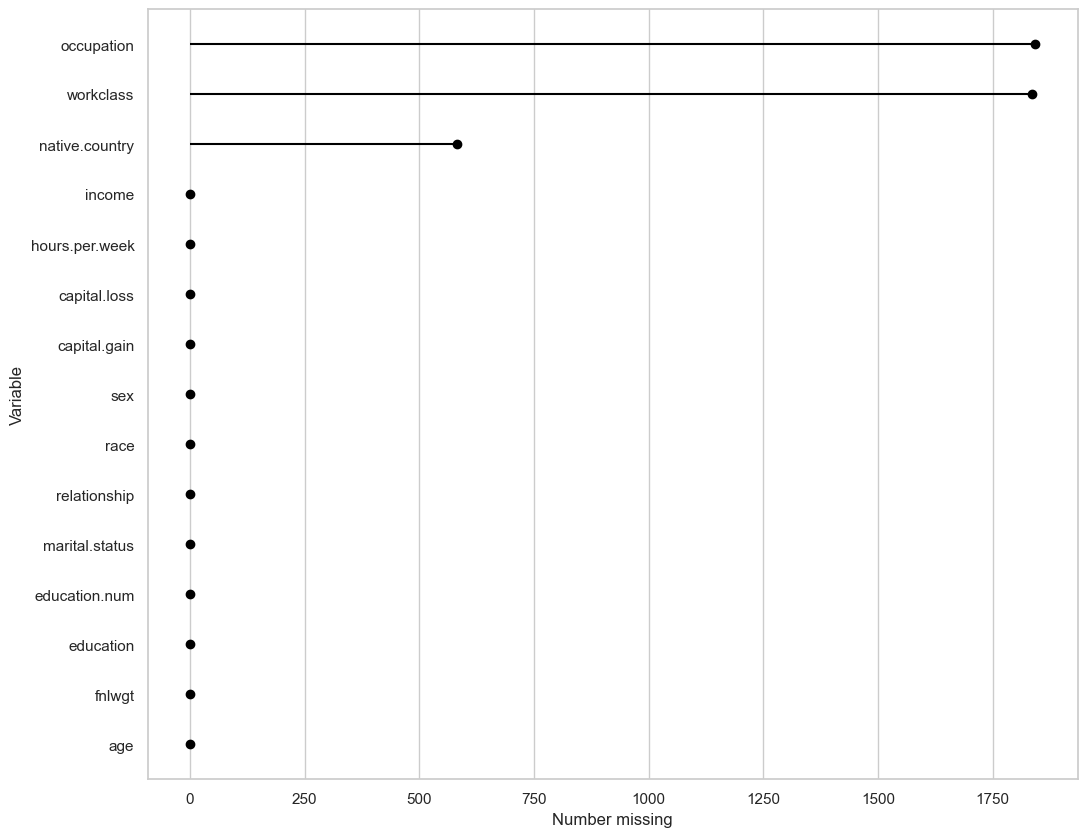

In [13]:
df.missing.missing_variable_plot()

Tenemos valores faltantes en las variables *workclass*, *occupation* y *native.country* las cuales son categóricas y cuentan con varios niveles lo cual hace difícil la interpolación de dichos valores faltantes; por tanto, prescindiremos de ellos.

In [14]:
# Utilizamos la función dropna para eliminar los valores faltantes del conjunto de datos
df.dropna(
    # Lista de variables donde buscar los valores faltantes
    subset = ["workclass", "occupation", "native.country"],
    # Eliminar cualquier observación que contenga al menos 1 valor faltante
    how = "any",
    # Eliminar en el mismo dataset
    inplace = True
)

In [15]:
print(df.shape, df.isnull().sum(), sep = "\n\n")

(30162, 15)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


Después de la eliminación de valores faltantes quedamos con 30162 observaciones; es decir, perdimos cerca del 7.5% de los datos.

Lo siguiente será eliminar del conjunto de datos la variable *fnlwgt* la cual es un *final weigth* y lo que hace es que personas con características socio-económicas y demográficas similares tengan a su vez un *fnlwgt* cercano entre ellos. Eliminamos esta variable ya que proporciona información redundante.

In [16]:
# Eliminamos la variable fnlwgt del conjunto de datos; se elimina toda la columna; el resultado se guarda en el mismo dataset
df.drop(["fnlwgt"], axis = 1, inplace = True)
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


Ahora convertiremos la variable *income* a binaria ya que es más fácil para el modelo trabajar de esta manera. 0 significa que dicha persona tiene ingresos anuales menores o iguales a $50000 y 1 representa que tiene ingresos anuales mayores a $50000.

In [17]:
df.replace({
    "<=50K" : 0,
    ">50K" : 1
}, inplace = True)

df.income

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30162, dtype: int64

In [18]:
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


Procedemos a codificar las variables categóricas utilizando One Hot Encoding; esto con el fin de que sea más fácil para el modelo trabajar con dichas variables. Guardaremos en un nuevo dataframe este conjunto de datos con las variables codificadas para más adelante poder hacer análisis descriptivos y exploratorios con las variables categóricas sin codificar.

In [19]:
# Lista con las variables categóricas a codificar
categoricalColumns = ["workclass", "education", "marital.status", "occupation", "relationship", "race", "sex", "native.country"]
dfProcessed = pd.get_dummies(df, columns = categoricalColumns)
dfProcessed

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,9,0,3770,45,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,38,6,0,3770,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,9,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Análisis Exploratorio

Comenzaremos visualizando la proporción de personas que tienen ingresos menores o iguales a $50000 vs las que tienen ingresos mayores a $50000.

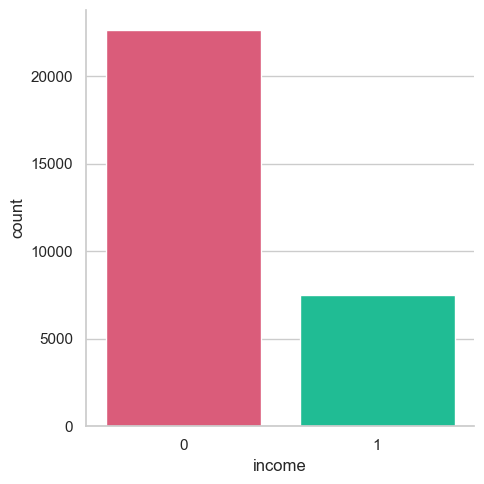

In [20]:
sns.catplot(
    data = df,
    x = "income",
    kind = "count",
    palette = incomeColors
)
plt.show()

Observamos que en los datos tenemos más observaciones de personas con ingresos anuales menores o iguales a $50000 por lo que más adelante tendremos que utilizar metodologías para obtener un muestreo equilibrado.

Utilizaremos la función *pairplot* de Seaborn la cual es muy útil ya que nos proporciona gráficos de distribución y de dispersión de todas las variables numéricas del dataset; en este caso, agruparemos por nuestra variable target.

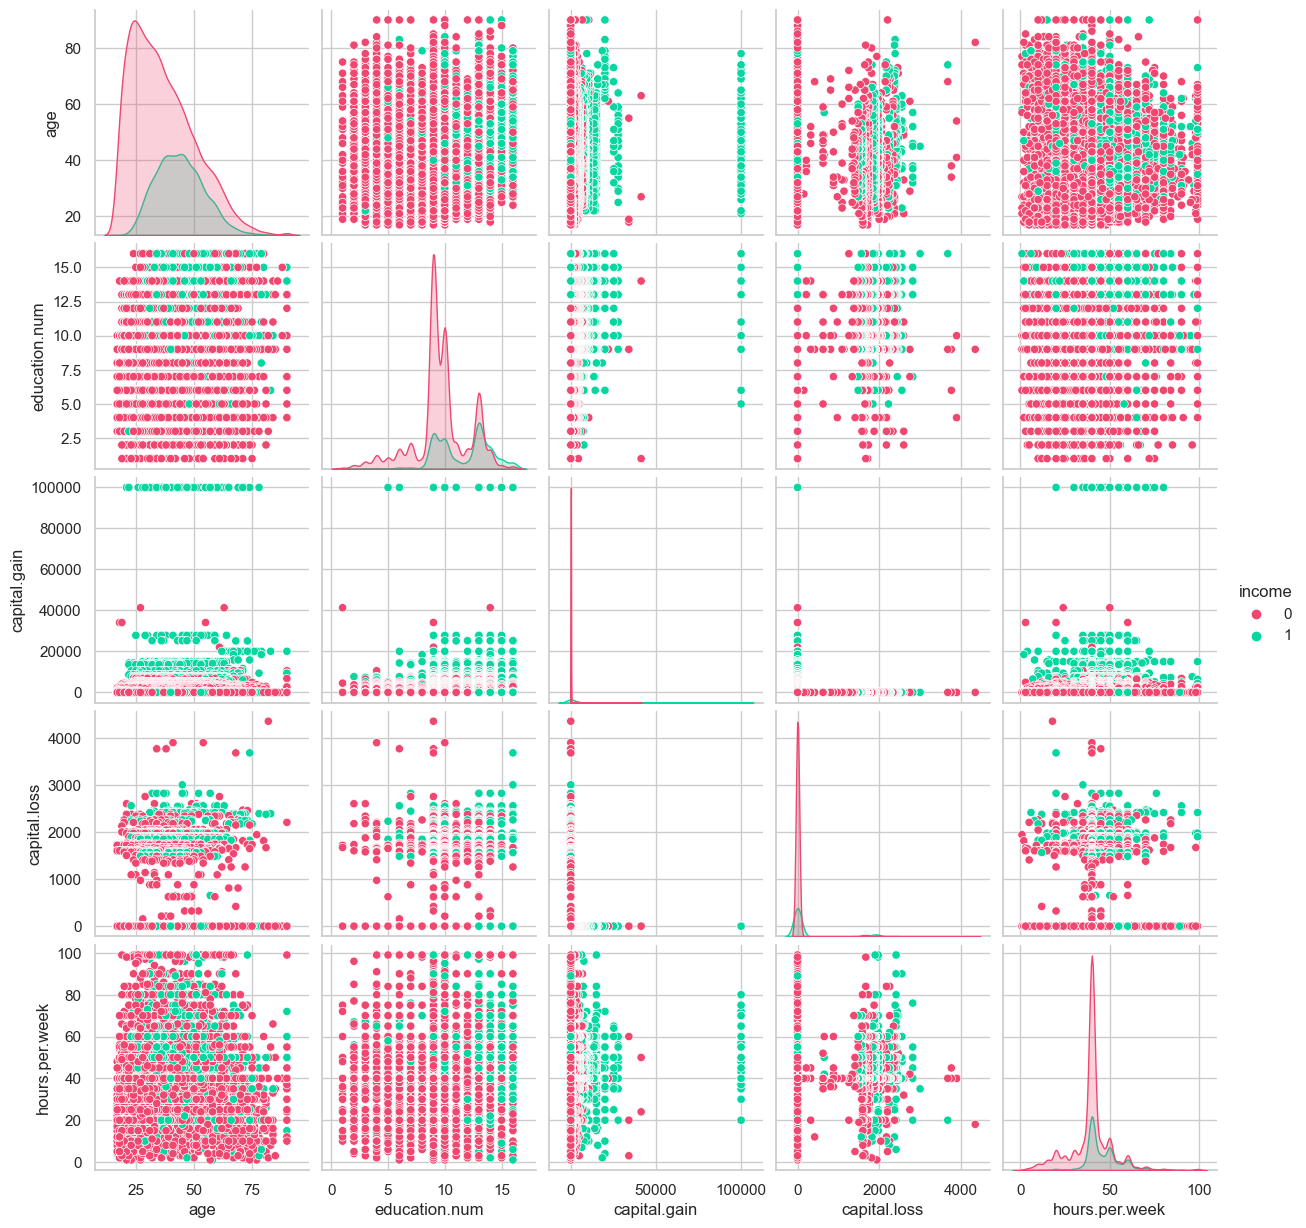

In [21]:
sns.pairplot(
    data = df,
    hue = "income",
    palette = incomeColors
)
plt.show()

También utilizaremos la función de *describe* de Pandas para apoyarnos; de la misma manera haremos una segmentación respecto a la variable target.

In [22]:
df[df["income"] == 1].describe()

,age,education.num,capital.gain,capital.loss,hours.per.week,income
count,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.0
mean,43.959110,11.606420,3937.679808,193.750666,45.706580,1.0
std,10.269633,2.368423,14386.060019,592.825590,10.736987,0.0
min,19.000000,2.000000,0.000000,0.000000,1.000000,1.0
25%,36.000000,10.000000,0.000000,0.000000,40.000000,1.0
50%,43.000000,12.000000,0.000000,0.000000,40.000000,1.0
75%,51.000000,13.000000,0.000000,0.000000,50.000000,1.0
max,90.000000,16.000000,99999.000000,3683.000000,99.000000,1.0


In [23]:
df[df["income"] == 0].describe()

,age,education.num,capital.gain,capital.loss,hours.per.week,income
count,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.0
mean,36.608060,9.629116,148.893838,53.448000,39.348592,0.0
std,13.464631,2.413596,936.392280,310.270263,11.950774,0.0
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.0
25%,26.000000,9.000000,0.000000,0.000000,38.000000,0.0
50%,34.000000,9.000000,0.000000,0.000000,40.000000,0.0
75%,45.000000,10.000000,0.000000,0.000000,40.000000,0.0
max,90.000000,16.000000,41310.000000,4356.000000,99.000000,0.0


Podemos destacar varias cosas interesantes:
- La edad promedio de los personas cuyos ingresos anuales son mayores a $50000 es mayor que las personas cuyos ingresos anuales son menores o iguales a $50000.
- Las personas que ganan más de $50000 al año tienen en promedio un mayor nivel educativo que aquellas que no.
- Las personas que personas que con ingresos anuales mayores a $50000 trabajan en promedio más horas a las semanas que las personas con ingresos anuales menores o iguales a $50000.

Lo siguiente es visualizar la proporción de nuestra variable target en las distintas variables categóricas.

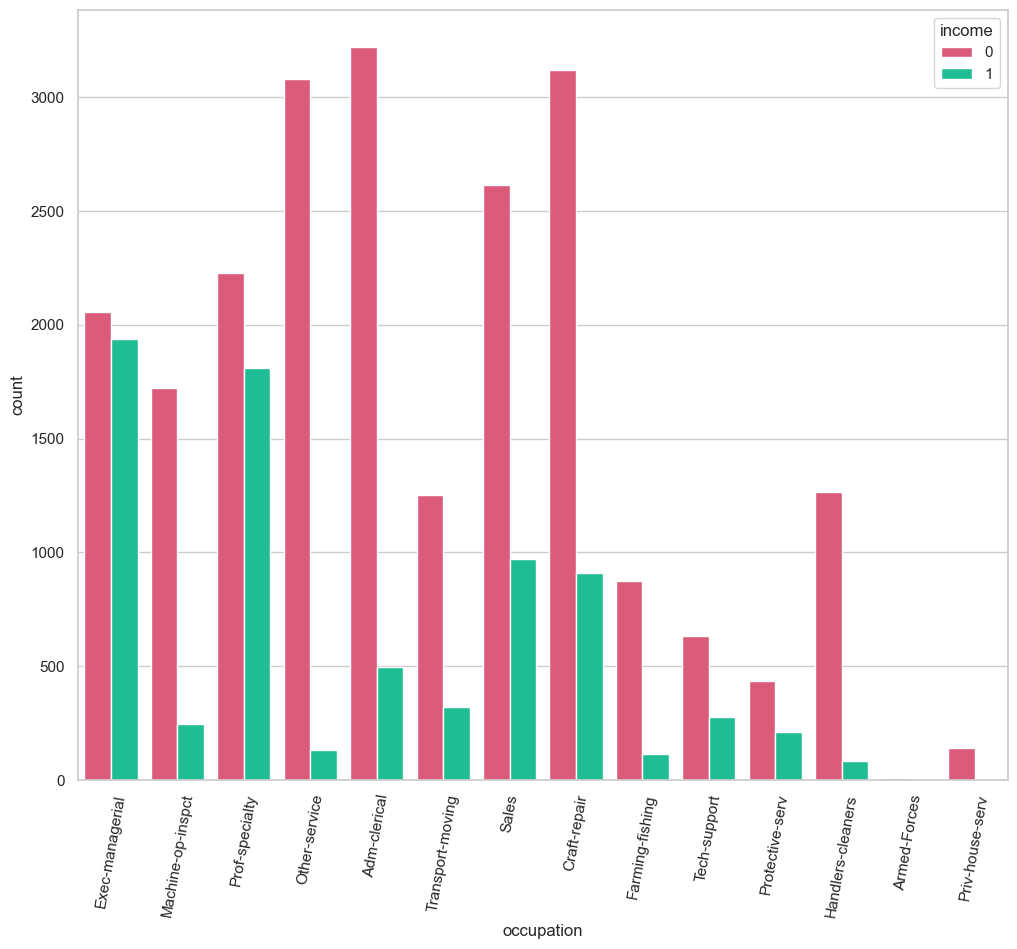

In [24]:
sns.countplot(
    data = df,
    x = "occupation",
    hue = "income",
    palette = incomeColors
)
plt.xticks(rotation = 80)
plt.show()

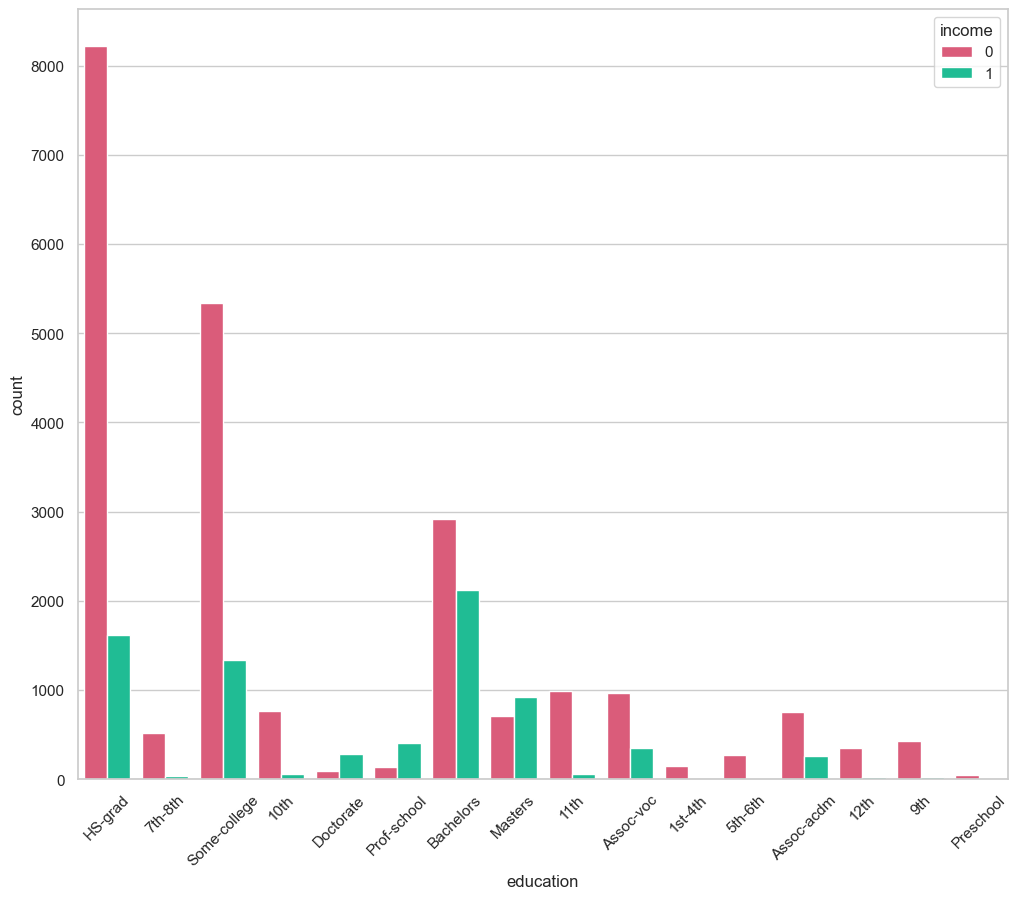

In [25]:
sns.countplot(
    data = df,
    x = "education",
    hue = "income",
    palette = incomeColors
)
plt.xticks(rotation = 45)
plt.show()

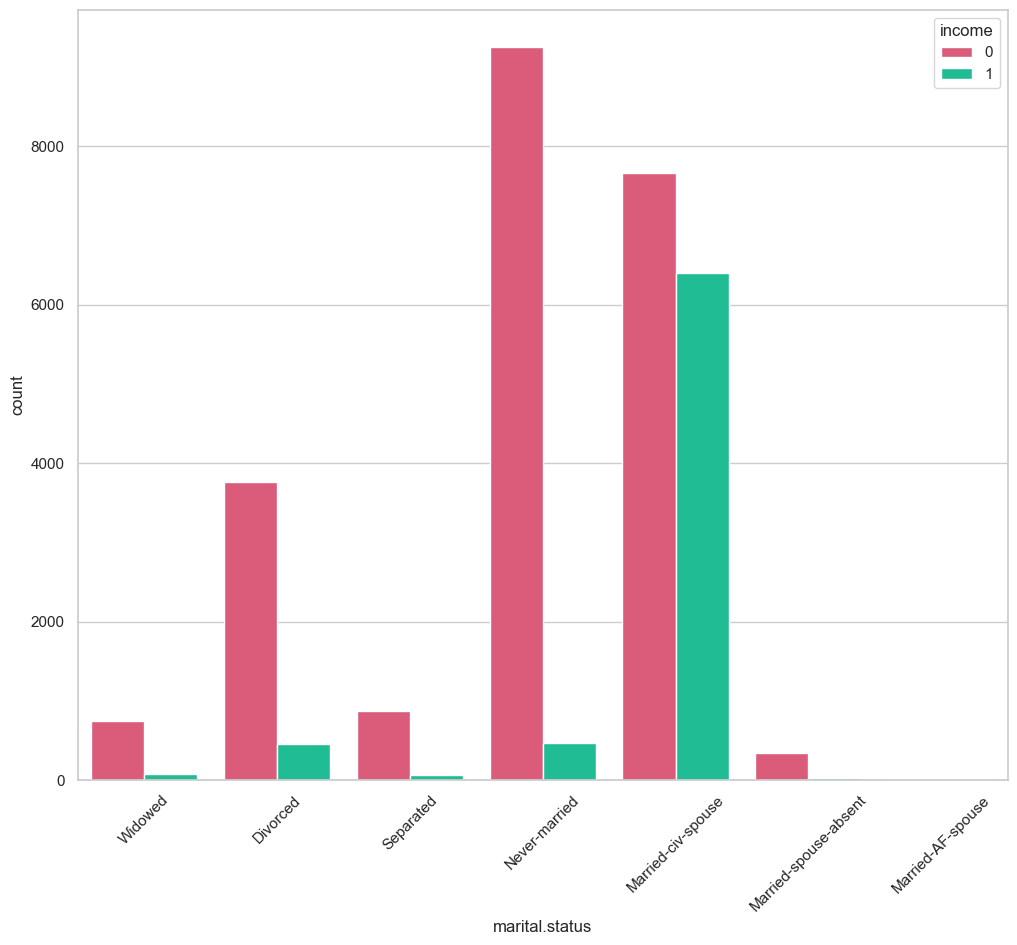

In [26]:
sns.countplot(
    data = df,
    x = "marital.status",
    hue = "income",
    palette = incomeColors
)
plt.xticks(rotation = 45)
plt.show()

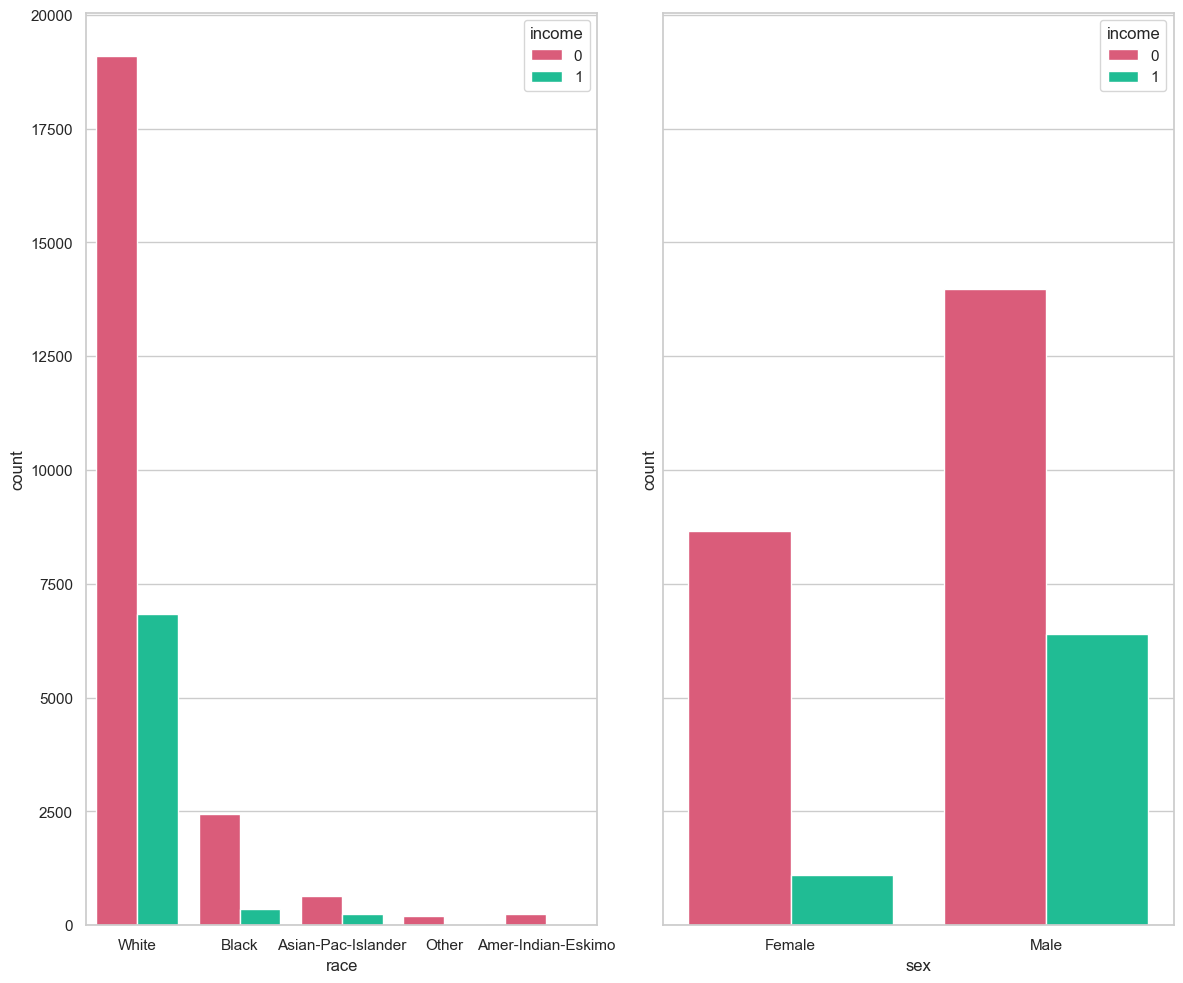

In [27]:
fig, axes = plt.subplots(1, 2, sharey = True)

sns.countplot(
    data = df,
    x = "race",
    hue = "income",
    palette = incomeColors,
    ax = axes[0]
)
sns.countplot(
    data = df,
    x = "sex",
    hue = "income",
    palette = incomeColors,
    ax = axes[1]
)
fig.tight_layout()

A partir de las variables categóricas podemos destacar lo siguiente:
- Las personas con ingresos anuales mayores a $50000 están en ocupaciones más ejecutivas y administrativas mientras que su contraparte se centra en ocupaciones de trabajos manuales y pesados aunque también en ventas y administración.
- Aquellas personas cuyos ingresos anuales son mayores a $50000 tienen un mayor nivel educativo que su contraparte.
- La mayoría de personas con ingresos anuales menores o iguales a $50000 nunca se han casado.
- Las personas cuyos ingresos anuales superan los $50000 son en su mayoría hombres.
- Las personas cuyos ingresos anuales superan los $50000 son en su mayoría de raza blanca.

Ahora exploraremos la correlación que existe entre las variables del dataset utilizando un mapa de calor.

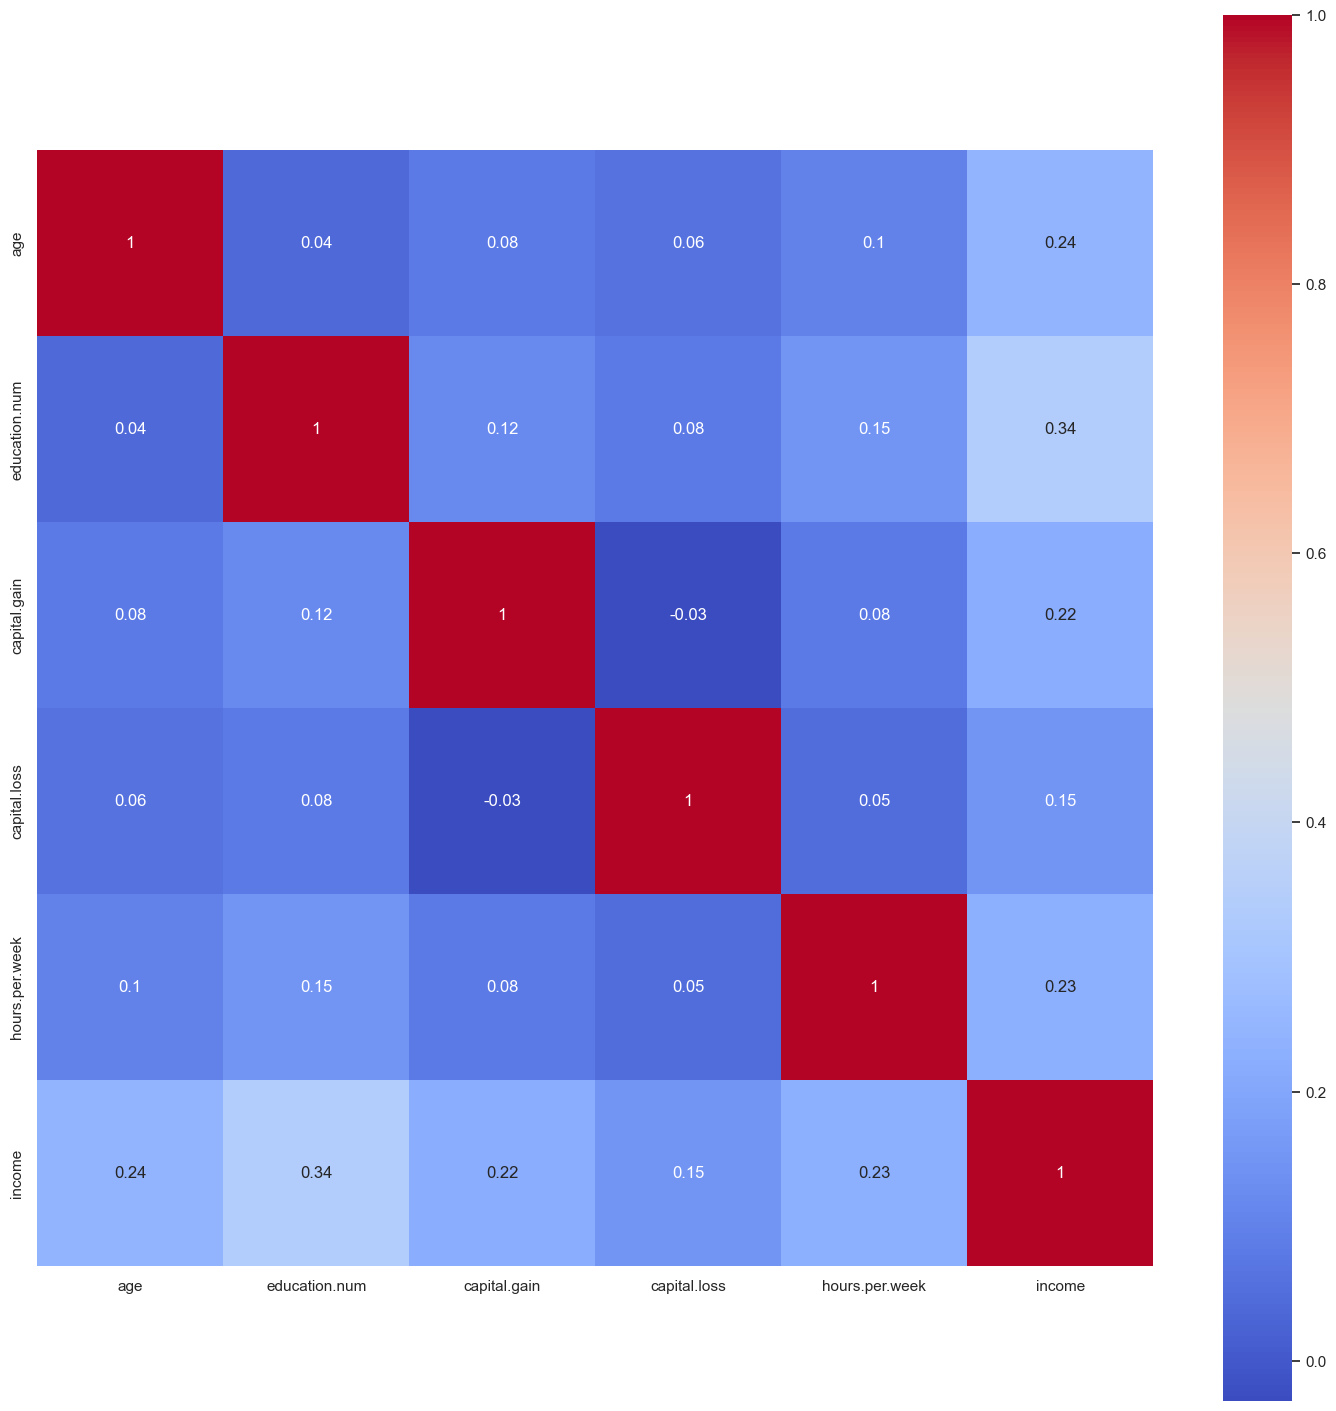

In [28]:
plt.figure(figsize = (18, 18))
sns.heatmap(
    data = df.corr(numeric_only = True).round(2),
    annot = True,
    cmap = "coolwarm",
    square = True    
)
plt.show()

No parece que haya una fuerte correlación entre variables.

Ahora visualizaremos de nuevo la correlación pero usando el dataset que contiene a nuestras variables categóricas codificadas.

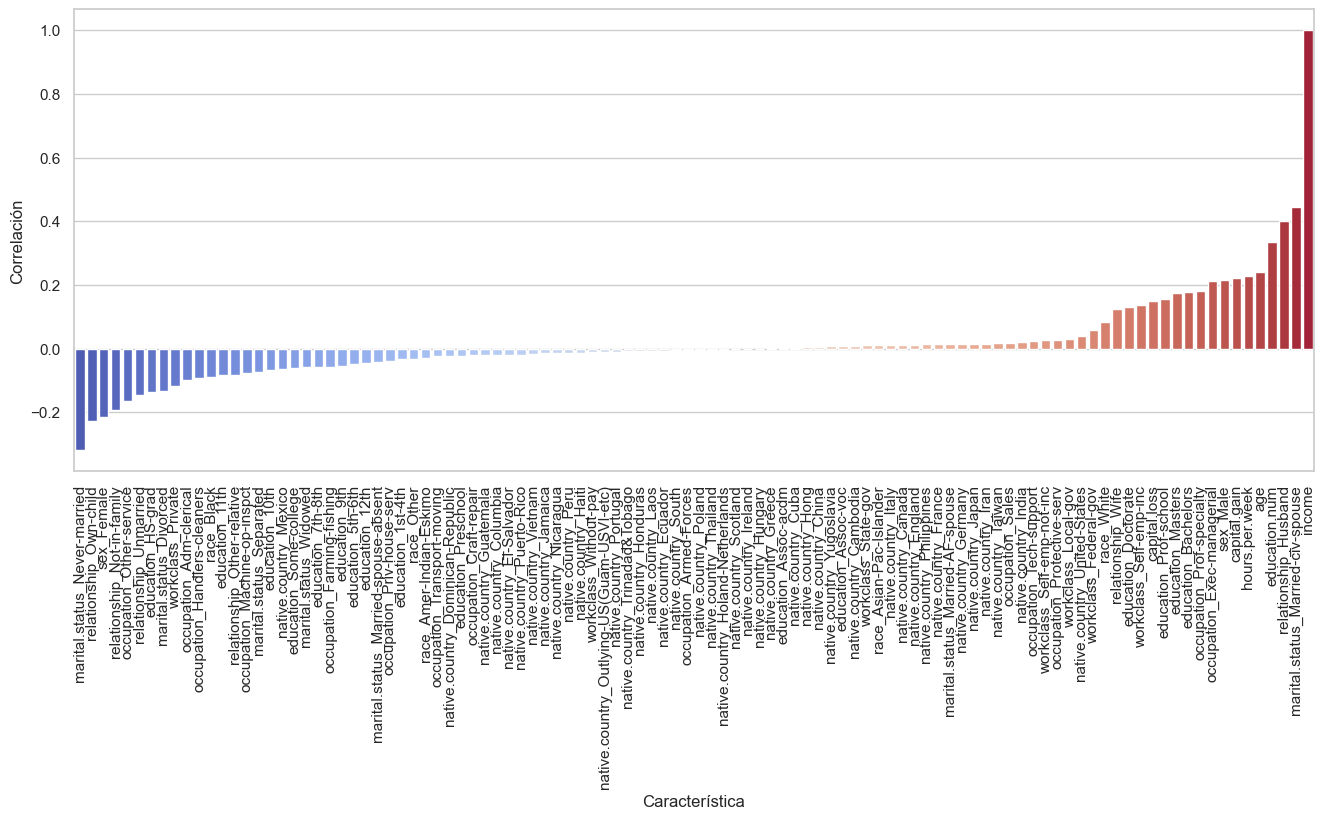

In [29]:
# Correlación respecto a la variable income; organizamos los valores de manera ascendente
dataCorr = (dfProcessed.corr()["income"].sort_values(ascending = True)).reset_index()

# Utilizamos un gráfico de barras rotado a 90° para mostrar la correlación
plt.figure(figsize = (16, 6)) 
sns.barplot(
    data = dataCorr,
    x = "index",
    y = "income",
    palette = "coolwarm"
)
plt.xlabel("Característica")
plt.ylabel("Correlación")
plt.xticks(rotation = 90)
plt.show()

Las variables que están más correlacionadas con nuestra variable target **income** son *marital.status_Married-civ-spouse*, *relationship_Husband*, *education_num*, *age*, *hours.per.week*, *capital.gain* y *sex_Male*.

## Balanceo de Datos

Como observamos, nuestro conjunto de datos está desbalanceado respecto a  la varaiable target **income** así que aplicaremos la metodología SMOTE: Técnica estadística de sobremuestreo de minorías sintéticas para aumentar el número de muestras del conjunto de datos y hacer que esté más equilibrado.

Primero dividiremos el conjunto de datos entre las variables predictoras y la variable target.

In [30]:
# Variables predictoras
X = dfProcessed.drop("income", axis = 1)
# Variable target
y = dfProcessed.income.values

Ahora aplicamos SMOTE.

In [31]:
# Aplicamos SMOTE para balancear el dataset
oversample = SMOTE()
XSmote, ySmote = oversample.fit_resample(X, y)

## Escalar los datos y división en conjunto de training y testing

Escalamos los datos para que sea más fácil para el algoritmo entender cómo manejar las variables y dividiremos entre conjunto de entrenamiento y conjunto de testing con un 20% de los datos para testing.

In [32]:
# Creamos el escalador
scaler = MinMaxScaler()
# Dividimos los datos en entrenamiento y testing
XTrainSmote, XTestSmote, yTrainSmote, yTestSmote = train_test_split(XSmote, ySmote, test_size = 0.2, random_state = 42)
# Escalamos las variables predictoras
XTrainSmoteScaled = scaler.fit_transform(XTrainSmote) 
XTestSmoteScaled = scaler.fit_transform(XTestSmote)

## Reducción de Dimensionalidad con PCA

Utilizaremos el análisis de componentes principales para reducir la dimensionalidad del conjunto de datos ya que tenemos cerca de 100 variables predictoras.

In [33]:
# Creamos el modelo para PCA
pca = PCA()
# Entrenamos el modelo y transformamos los datos
XTrainSmoteScaledPCA = pca.fit_transform(XTrainSmoteScaled)
XTestSmoteScaledPCA = pca.fit_transform(XTestSmoteScaled)
pca.explained_variance_ratio_

array([2.08403437e-01, 7.75013306e-02, 6.81943692e-02, 5.81547470e-02,
       5.12004487e-02, 4.42662035e-02, 4.01253753e-02, 3.50409006e-02,
       2.90361269e-02, 2.80887122e-02, 2.44832016e-02, 2.27101401e-02,
       2.17669018e-02, 1.97443502e-02, 1.90192582e-02, 1.59529611e-02,
       1.50350686e-02, 1.42575626e-02, 1.36184192e-02, 1.15307268e-02,
       1.11237602e-02, 9.84170247e-03, 9.33942137e-03, 9.00464954e-03,
       8.52725249e-03, 8.01108929e-03, 7.71765953e-03, 7.10136937e-03,
       6.80209254e-03, 6.53603806e-03, 6.15777624e-03, 6.01482930e-03,
       5.86108845e-03, 5.64063308e-03, 5.17443614e-03, 4.72169024e-03,
       4.20954825e-03, 4.02625741e-03, 3.82168972e-03, 3.74355671e-03,
       3.64011907e-03, 3.26245497e-03, 3.13442643e-03, 2.88892139e-03,
       2.72323456e-03, 2.58948275e-03, 2.47250340e-03, 2.40951167e-03,
       2.04385425e-03, 1.91661725e-03, 1.64039779e-03, 1.50607643e-03,
       1.42168823e-03, 1.11602287e-03, 1.03906210e-03, 9.90252407e-04,
      

Creamos una gráfica para una mejor comprensión de la varianza acumulada.

[]

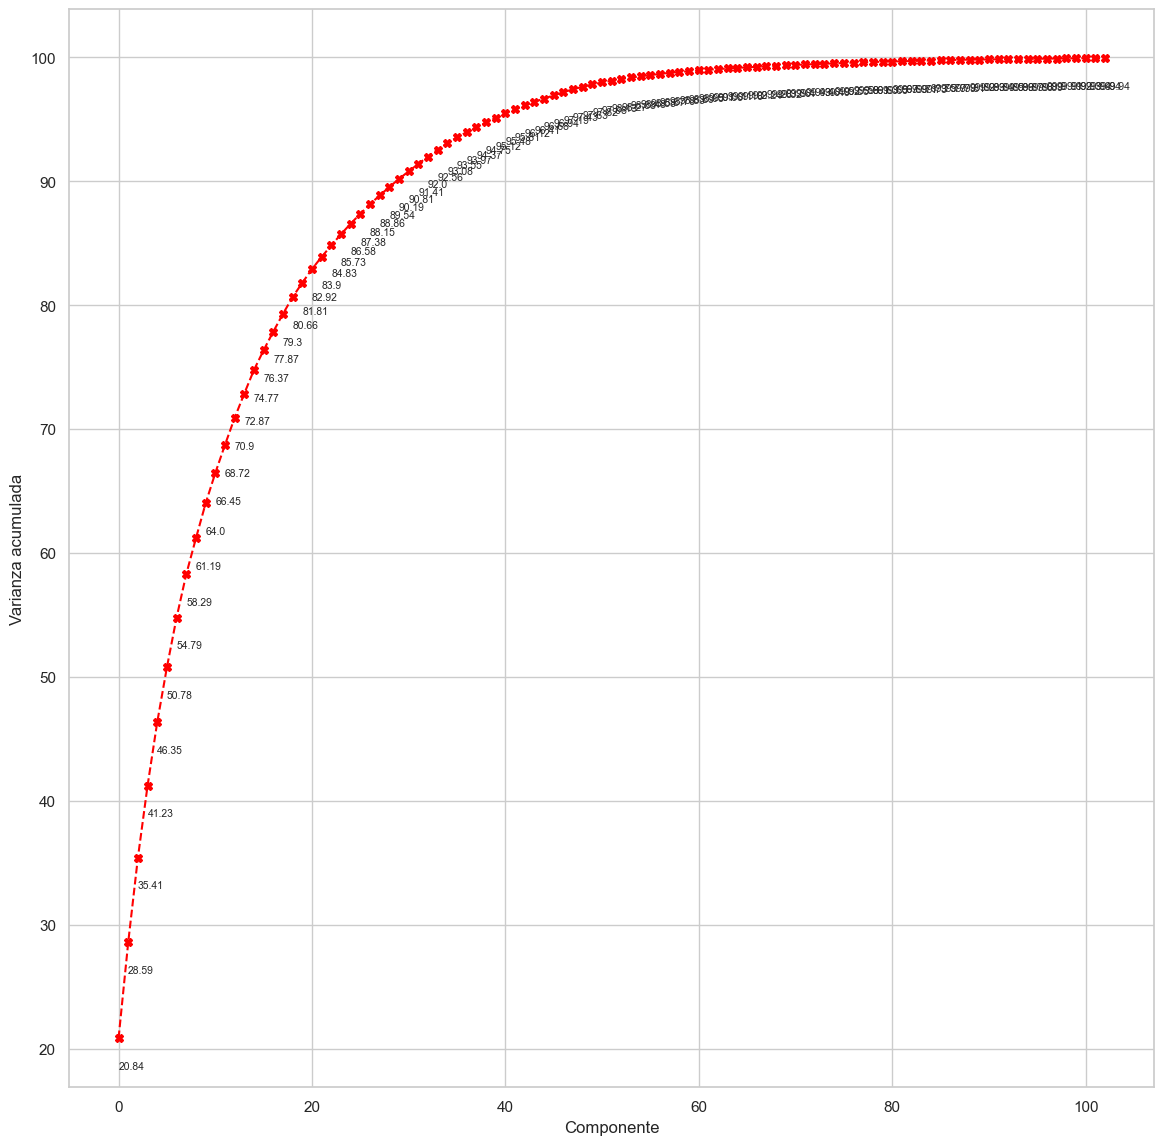

In [34]:
# Varianza acumulada
accVar = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)
# Lista para guardar el número del componente
components = np.arange(0, 103)

plt.figure(figsize = (14, 14))
# Iteramos a través de los componentes y su respectiva varianza acumulada
for component, aV in zip(components, accVar):
    plt.annotate(round(aV, 2), xy = (component, aV - 2.5), size = 7.5)
    
plt.plot(accVar, color = "red", marker = "X", linestyle = "--")
plt.xlabel("Componente")
plt.ylabel("Varianza acumulada")
plt.plot()

Vemos que utilizando 40 componentes capturamos alrededor del 95% de la varianza así que trabajaremos con ellos.

In [35]:
# Creamos un df con los datos escalados y con el PCA aplicado
XTrainSmoteScaledPCA = pd.DataFrame(XTrainSmoteScaledPCA)
XTestSmoteScaledPCA = pd.DataFrame(XTestSmoteScaledPCA)
# Eliminamos los componentes 41 en adelante en adelante
XTrainSmoteScaledPCA.drop(np.arange(41, 103), axis = 1, inplace = True)
XTestSmoteScaledPCA.drop(np.arange(41, 103), axis = 1, inplace = True)

In [36]:
XTrainSmoteScaledPCA

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.759846,-0.084610,0.572109,0.719133,0.206036,0.260223,0.015011,0.137985,-0.203984,-0.225878,...,-0.107651,0.041946,-0.038252,-0.032523,0.028517,0.043661,0.129435,0.095848,-0.119817,0.106457
1,0.837467,-0.677499,-0.973675,-0.118604,0.630519,-0.055727,1.075710,-0.245870,-0.624259,-0.313053,...,0.015804,-0.028827,-0.006286,-0.028644,0.044976,-0.091319,0.056857,0.073390,-0.147867,0.106435
2,1.228895,0.376681,0.520793,-0.705577,0.514983,-0.788902,0.049642,-0.015917,1.045224,-0.231917,...,-0.051762,-0.091105,-0.032173,-0.017996,0.046734,-0.051444,-0.012698,-0.008775,-0.003265,-0.004353
3,-0.810796,0.159311,-0.135016,-0.250080,-0.239675,0.044066,-0.092943,-0.873060,-0.055310,0.434875,...,-0.083779,-0.252099,0.235612,0.336235,0.648606,0.199856,-0.188206,0.273252,-0.213901,-0.107369
4,-0.870228,-0.145909,0.475140,0.756341,0.098647,0.082304,-0.210121,0.127656,-0.054055,-0.094774,...,0.019481,-0.074349,0.028119,-0.012629,-0.007797,-0.160944,0.021520,-0.042223,0.028831,-0.192937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36241,-0.896832,-0.114276,0.423747,0.967633,0.202455,0.106128,-0.283003,0.217732,-0.019673,-0.196576,...,-0.326224,0.331686,-0.251729,-0.277841,0.233509,0.172612,0.000823,-0.176845,-0.123912,0.119931
36242,-0.910582,0.581178,-0.336539,0.101477,-0.303261,0.210638,-0.189617,0.267625,0.441017,-0.842927,...,0.012830,-0.051439,-0.014668,-0.003433,0.013448,-0.048461,-0.069983,-0.067056,-0.032770,-0.090953
36243,0.624665,0.352697,-1.147989,0.949986,-0.049793,-0.043895,-0.151733,-0.709504,-0.484651,0.475206,...,-0.023410,-0.031343,-0.031162,-0.038270,-0.078629,-0.088001,-0.004625,-0.031562,0.088396,-0.183589
36244,1.475648,0.292542,-0.501849,-0.356969,-0.793727,0.033144,-0.323843,0.108002,-0.209706,-0.942631,...,-0.078871,-0.049054,-0.046024,0.002092,0.081778,-0.024542,-0.013914,-0.066717,0.040618,0.044564


De esta manera, logramos reducir a 41 el número de variables a utilizar en el modelo capturando aproximadamente el 95% de la varianza de los datos.

## Clasificación con Decision Trees

### Construcción y Entrenamiento del Modelo de Decision Trees

Procedemos a construir y entrenar el modelo de clasificación utilizando árboles de decisión con una profundidad máxima de 10. Más adelante optimizaremos estos parámetros.

Realizaremos predicciones con Training y Testing para verificar el Overfitting.

In [115]:
# Construcción del modelo de árboles de decisión con una profundidad máxima de 10
treeModel = DecisionTreeClassifier(max_depth = 10, random_state = 42)
# Entrenamiento del modelo con los datos de training
treeModel.fit(XTrainSmoteScaledPCA, yTrainSmote)
# Predicciones para Training
treeModelTrainPred = treeModel.predict(XTrainSmoteScaledPCA)
# Predicciones para Testing
treeModelTestPred = treeModel.predict(XTestSmoteScaledPCA)

### Evaluación del Modelo

Ya con el modelo entrenado y unas predicciones realizadas entonces procedemos a evaluar el modelo mediante el **Accuracy Score**.

In [116]:
# Accuracy Score del modelo de árboles de decisión con los datos de training
accTreeModelTrainPred = accuracy_score(yTrainSmote, treeModelTrainPred)

# Accuracy Score del modelo de árboles de decisión con los datos de testing
accTreeModelTestPred = accuracy_score(yTestSmote, treeModelTestPred)

print(f"El Accuracy Score del modelo para Training es {accTreeModelTrainPred}")
print(f"El Accuracy Score del modelo para Testing es {accTreeModelTestPred}")

El Accuracy Score del modelo para Training es 0.8980577167135684
El Accuracy Score del modelo para Testing es 0.7741116751269036


Ahora vamos a ver las características más significativas en el modelo.

In [117]:
# Creamos un df con las feature importances
treeFeatureImportances = pd.DataFrame(
    # Creamos un diccionario que contiene la lista de feature y las importancias de las mismas
    {"feature" : list(XTrainSmoteScaledPCA.columns), "importance" : treeModel.feature_importances_} 
    # Ordenamos los valores de importancia de forma descendente
).sort_values("importance", ascending = False)

treeFeatureImportances

,feature,importance
0,0,0.473221
1,1,0.111143
17,17,0.041375
23,23,0.031513
32,32,0.029712
29,29,0.022869
28,28,0.022586
33,33,0.020969
20,20,0.020774
35,35,0.013949


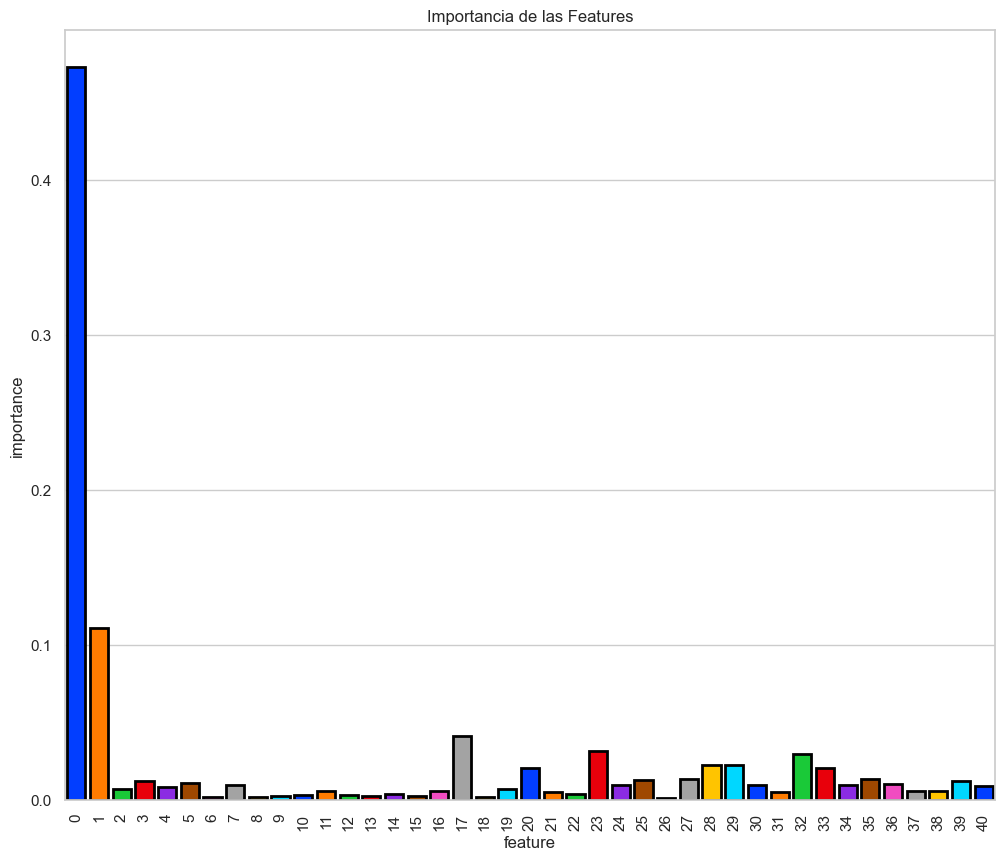

In [118]:
sns.barplot(
    # Número de la feature
    x = treeFeatureImportances.feature,
    # Importancdia
    y = treeFeatureImportances.importance,
    # Paleta
    palette = "bright",
    # Saturación
    saturation = 2.0,
    # Bordes negros
    edgecolor = "black",
    # Bordes gruesos
    linewidth = 2
)
plt.xticks(rotation = 90)
plt.title("Importancia de las Features")
plt.show()

Finalmente, visualizamos un reporte de clasificación.

In [119]:
print("Reporte de Clasificación para predicciones con Training", classification_report(yTrainSmote, treeModelTrainPred), sep = "\n\n")
print("\n---------------------------------------------------------------------------- \n")

print("Reporte de Clasificación para predicciones con Testing", classification_report(yTestSmote, treeModelTestPred), sep = "\n\n")

Reporte de Clasificación para predicciones con Training

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     18100
           1       0.88      0.92      0.90     18146

    accuracy                           0.90     36246
   macro avg       0.90      0.90      0.90     36246
weighted avg       0.90      0.90      0.90     36246


---------------------------------------------------------------------------- 

Reporte de Clasificación para predicciones con Testing

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      4554
           1       0.77      0.78      0.78      4508

    accuracy                           0.77      9062
   macro avg       0.77      0.77      0.77      9062
weighted avg       0.77      0.77      0.77      9062



Podemos concluir lo siguiente:
- Las predicciones con los datos de Training nos arrojan un Accuracy Score de aproximadamente 90%; con Testing el Accuracy Score es de alrededor del 77%. Esto podría indicarnos que hay Overfitting en el modelo.
- Las características 0 y 1 son las que más le aportan al modelo ya que concentran cerca del 58% de la importancia total del mismo. 
- En las 15 carácteristicas más significativas se concentra aproximadamente el 85% de la importancia total del modelo; esto quiere decir que las otras 26 características aportan muy poco al modelo por lo que sería buena idea crear un nuevo modelo sin estas últimas.
- El modelo consiguió buenos resultados en cuanto a las métricas siendo casi todas de 0.9; el mayor problema es el posible Overfitting.

## Clasificación con Random Forests

### Construcción y Entrenamiento del Modelo de Random Forests

Procedemos a construir y entrenar el modelo de clasificación utilizando Random Forests con 30 árboles de decisión y una profundidad máxima de 10. Más adelante optimizaremos estos parámetros.

Realizaremos predicciones con Training y Testing para verificar el Overfitting.

In [140]:
# Construcción del modelo de random forest con 30 árboles y una profundidad máxima de 10
forestModel = RandomForestClassifier(n_estimators = 30, max_depth = 10, random_state = 42)
# Entrenamiento del modelo con los datos de training
forestModel.fit(XTrainSmoteScaledPCA, yTrainSmote)
# Predicciones para Training
forestModelTrainPred = forestModel.predict(XTrainSmoteScaledPCA)
# Predicciones para Testing
forestModelTestPred = forestModel.predict(XTestSmoteScaledPCA)

### Evaluación del Modelo

Ya con el modelo entrenado y unas predicciones realizadas entonces procedemos a evaluar el modelo mediante el **Accuracy Score**.

In [141]:
# Accuracy Score del modelo de random forest con los datos de training
accForestModelTrainPred = accuracy_score(yTrainSmote, forestModelTrainPred)

# Accuracy Score del modelo de random forest con los datos de testing
accForestModelTestPred = accuracy_score(yTestSmote, forestModelTestPred)

print(f"El Accuracy Score del modelo para Training es {accForestModelTrainPred}")
print(f"El Accuracy Score del modelo para Testing es {accForestModelTestPred}")

El Accuracy Score del modelo para Training es 0.8973128069304199
El Accuracy Score del modelo para Testing es 0.8108585301258


Ahora vamos a ver las características más significativas en el modelo.

In [142]:
# Creamos un df con las feature importances
forestFeatureImportances = pd.DataFrame(
    # Creamos un diccionario que contiene la lista de feature y las importancias de las mismas
    {"feature" : list(XTrainSmoteScaledPCA.columns), "importance" : forestModel.feature_importances_} 
    # Ordenamos los valores de importancia de forma descendente
).sort_values("importance", ascending = False)

forestFeatureImportances

,feature,importance
0,0,0.296778
15,15,0.054778
1,1,0.054658
17,17,0.043933
14,14,0.030982
24,24,0.030177
23,23,0.028295
8,8,0.026149
18,18,0.023708
20,20,0.023519


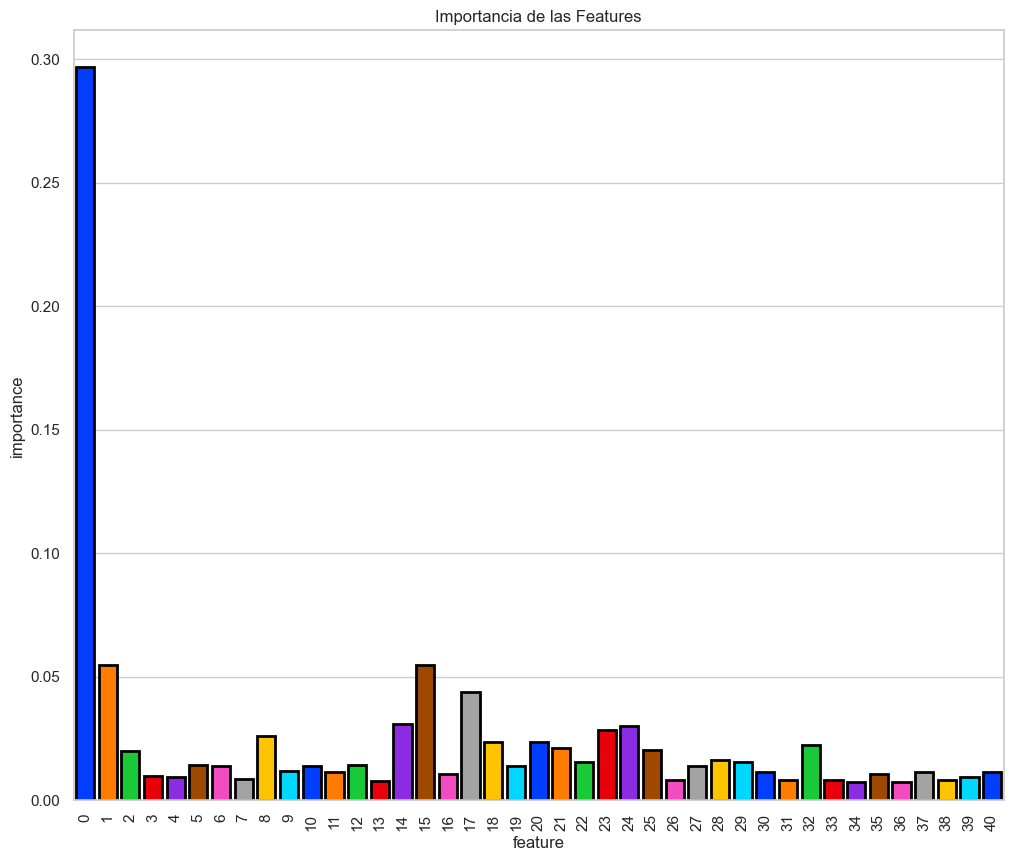

In [143]:
sns.barplot(
    # Número de la feature
    x = forestFeatureImportances.feature,
    # Importancdia
    y = forestFeatureImportances.importance,
    # Paleta
    palette = "bright",
    # Saturación
    saturation = 2.0,
    # Bordes negros
    edgecolor = "black",
    # Bordes gruesos
    linewidth = 2
)
plt.xticks(rotation = 90)
plt.title("Importancia de las Features")
plt.show()

Finalmente, visualizamos un reporte de clasificación.

In [144]:
print("Reporte de Clasificación para predicciones con Training", classification_report(yTrainSmote, forestModelTrainPred), sep = "\n\n")
print("\n---------------------------------------------------------------------------- \n")

print("Reporte de Clasificación para predicciones con Testing", classification_report(yTestSmote, forestModelTestPred), sep = "\n\n")

Reporte de Clasificación para predicciones con Training

              precision    recall  f1-score   support

           0       0.91      0.88      0.90     18100
           1       0.89      0.91      0.90     18146

    accuracy                           0.90     36246
   macro avg       0.90      0.90      0.90     36246
weighted avg       0.90      0.90      0.90     36246


---------------------------------------------------------------------------- 

Reporte de Clasificación para predicciones con Testing

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4554
           1       0.80      0.82      0.81      4508

    accuracy                           0.81      9062
   macro avg       0.81      0.81      0.81      9062
weighted avg       0.81      0.81      0.81      9062



Podemos concluir lo siguiente:
- Las predicciones con Training nos arrojan un Accuracy Score de aproximadamente 90%; con Testing este valor es de cerca del 81%. Parece que sigue habiendo un pequeño problema de Overfitting pero se nota una ligera mejora respecto al modelo con árboles de decisión.
- La importancia de las características está más distribuida y la única que se destaca y predomina es la número 0 que abarca casi el 30% de la importancia de todo el modelo.
- En general, los resultados con Random Forests son ligeramente mejores que los obtenidos con Decision Trees.

## Optimización Paramétrica

Para encontrar de forma automática los valores de los parámetros que optimizan nuestras métricas utilizaremos Optimización por Cuadrícula de Parámetros: definimos una o varias métricas que queremos optimizar, identificamos los posibles valores que pueden tener los parámetros, creamos un diccionario con los parámetros y sus posibles valores, usamos Cross Validation y entrenamos el modelo.

Primero crearemos dos nuevos modelos: uno con Decision Trees y otro con Random Forests. Por ahora no asignaremos valores a sus parámetros excepto a la semilla. 

In [37]:
treeModelCV = DecisionTreeClassifier(random_state = 42)
forestModelCV = RandomForestClassifier(random_state = 42)

Lo siguiente es crear un diccionario con los parámetros de los modelos que queremos optimizar y definir cómo vamos a evaluar los modelos.

In [38]:
# Diccionario con los parámetros a optimizar del modelo de Decision Trees
treeParams = {
    # Funciones para evaluar la calidad de una división
    "criterion" : ["gini", "entropy"],
    # Profundidad máxima del árbol
    "max_depth" : range(8, 16)
}

# Diccionario con los parámetros a optimizar del modelo de Random Forests
forestParams = {
    # Número de árboles que componen el bosque
    "n_estimators" : range(8, 21),
    # Funciones para evaluar la calidad de una división
    "criterion" : ["gini", "entropy"],
    # Profundidad máxima del árbol
    "max_depth" : range(8, 16)
}

# Métricas para evaluar el modelo
scores = ["accuracy", "f1"]

Buscamos los parámetros óptimos.

In [39]:
# Pasamos el modelo, los parámetros, las métricas para evaluar el score, el score que más nos interesa optimizar
treeGridSearch = GridSearchCV(treeModelCV, param_grid = treeParams, scoring = scores, refit = "accuracy")

# Pasamos el modelo, los parámetros y las métricas para evaluar el score, el score que más nos interesa optimizar
forestGridSearch = GridSearchCV(forestModelCV, param_grid = forestParams, scoring = scores, refit = "accuracy")

In [40]:
# Buscamos los parámetros óptimos del modelo de Decision Trees
treeGridSearch.fit(XTrainSmoteScaledPCA, yTrainSmote)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(8, 16)},
             refit='accuracy', scoring=['accuracy', 'f1'])

In [41]:
# Buscamos los parámetros óptimos del modelo de Random Forests
forestGridSearch.fit(XTrainSmoteScaledPCA, yTrainSmote)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(8, 16),
                         'n_estimators': range(8, 21)},
             refit='accuracy', scoring=['accuracy', 'f1'])

In [59]:
print(f"Modelo óptimo Decision Trees: {treeGridSearch.best_estimator_} \n\nParámetros óptimos: {treeGridSearch.best_params_} \n\n Score promedio: {treeGridSearch.best_score_}")
print("\n-------------------------------------------------------------------------------------------------\n")
print(f"Modelo óptimo Random Forests: {forestGridSearch.best_estimator_} \n\nParámetros óptimos: {forestGridSearch.best_params_} \n\n Score promedio: {forestGridSearch.best_score_}")

Modelo óptimo Decision Trees: DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=42) 

Parámetros óptimos: {'criterion': 'entropy', 'max_depth': 11} 

 Score promedio: 0.8499696681111782

-------------------------------------------------------------------------------------------------

Modelo óptimo Random Forests: RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=20,
                       random_state=42) 

Parámetros óptimos: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 20} 

 Score promedio: 0.8737791638323479


Los resultados que nos arroja la optimización por búsqueda de cuadrícula nos dicen que el mejor modelo respecto al Accuracy Score es el Random Forest con una profundidad máxima de 15 y con 20 árboles de decisión, además de un criterio de Entropy.

##

Realizado por Andrés Alexis Galvis Herrera [**@aleuse**](https://github.com/aleuse)